In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('l:/Мой диск/DataAnalysis/spaceship/datasets/spaceship_train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are total 8693 entries in dataset and only 'Transported' and 'PassengerID' features contain no NaN values.
'Transported' feature can be either True or False. Let's check if dataset is balanced

In [ ]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

There are near equal number of records. So dataset is balanced.\c\n
Let's check

In [6]:
df['VIP'] = df['VIP'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


<AxesSubplot:>

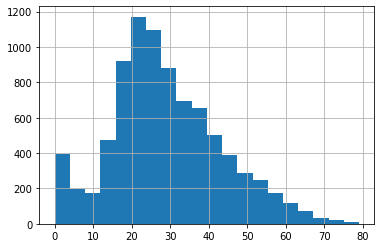

In [8]:
df['Age'].hist(bins=20)

c:\Applications\.venv\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


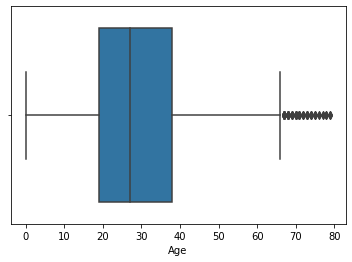

In [9]:
sns.boxplot(df['Age']);

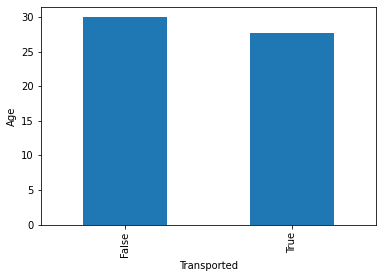

In [10]:
df.groupby('Transported')['Age'].mean().plot(kind='bar')
plt.ylabel('Age')
plt.show();

In [11]:
df['RoomService'].isna().value_counts()
#df['TotalSpend'] = df['RoomService'] + df['FoodCourt'] + df['Spa'] + df['ShoppingMall'] + df['VRDeck']

False    8512
True      181
Name: RoomService, dtype: int64

In [12]:
df[df['RoomService'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False
35,0031_03,Mars,False,F/9/P,TRAPPIST-1e,20.0,False,NaN,0.0,1750.0,990.0,0.0,Dontch Datie,True
83,0091_01,Earth,True,G/16/S,TRAPPIST-1e,26.0,False,NaN,0.0,0.0,0.0,0.0,Deanne Yorkland,True
132,0141_01,Mars,False,F/30/P,TRAPPIST-1e,31.0,False,NaN,0.0,97.0,0.0,0.0,Pyrohs Harte,False
170,0193_02,Mars,False,F/41/P,TRAPPIST-1e,23.0,False,NaN,0.0,8.0,1072.0,0.0,Frook Raf,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8425,8998_02,Earth,False,E/591/S,TRAPPIST-1e,47.0,False,NaN,1.0,0.0,967.0,5.0,Jonaye Englence,False
8450,9026_01,Earth,True,G/1463/P,TRAPPIST-1e,58.0,False,NaN,0.0,0.0,0.0,0.0,Mathy Boyers,True
8525,9101_01,Earth,False,F/1865/P,TRAPPIST-1e,21.0,False,NaN,0.0,496.0,430.0,0.0,Gera Frazie,False
8534,9112_01,Mars,False,D/290/P,TRAPPIST-1e,28.0,False,NaN,0.0,0.0,0.0,0.0,Wealke Brin,False


In [13]:
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [14]:
df['GroupId'] = df['PassengerId'].str.split(pat='_', expand=True).iloc[:, 0]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  GroupId       8693 non-null   object 
dtypes: bool(2), float64(6), object(7)
memory usage: 900.0+ KB


In [16]:
len(df[df['GroupId'] == '0020'])

6

In [17]:
def has_group(value):
    return len(df[df['GroupId'] == value]) > 1

In [18]:
df['HasGroup'] = df['GroupId'].apply(has_group)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  GroupId       8693 non-null   object 
 15  HasGroup      8693 non-null   bool   
dtypes: bool(3), float64(6), object(7)
memory usage: 908.5+ KB


In [20]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,HasGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,False


In [21]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [22]:
cabin_splitted = df['Cabin'].str.split(pat='/', expand=True)
cabin_splitted.head()

,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [23]:
df['Deck'] = df['Cabin'].str.split(pat='/', expand=True).iloc[:, 0]
df['CabinNo'] = df['Cabin'].str.split(pat='/', expand=True).iloc[:, 1]
df['Side'] = df['Cabin'].str.split(pat='/', expand=True).iloc[:, 2]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,HasGroup,Deck,CabinNo,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,False,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,True,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,True,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,False,F,1,S


In [24]:
print('Deck values:', df['Deck'].unique())
print('CabinNo values:', df['CabinNo'].unique())
print('Side values:', df['Side'].unique())

Deck values: ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
CabinNo values: ['0' '1' '2' ... '1892' '1893' '1894']
Side values: ['P' 'S' nan]


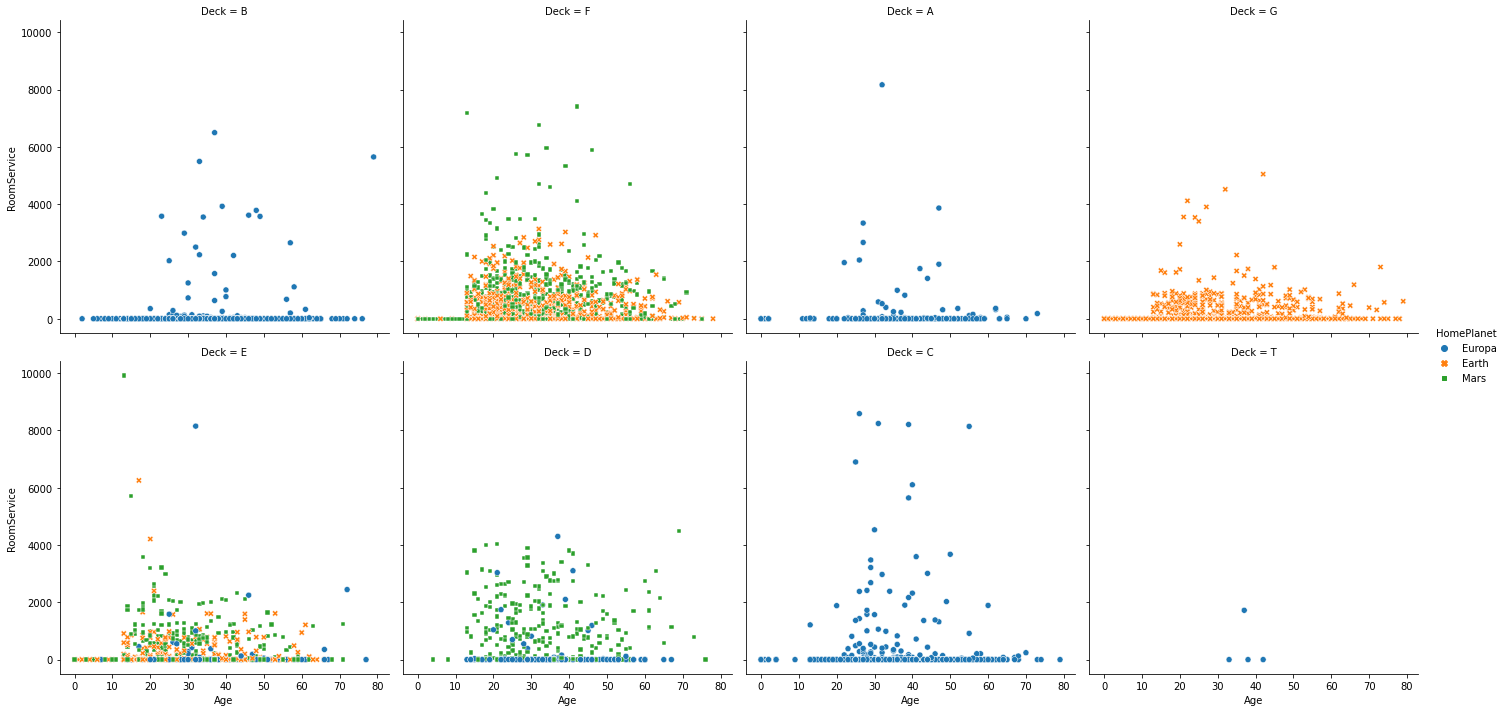

In [54]:
sns.relplot(x='Age', y='RoomService', hue='HomePlanet', style='HomePlanet', col='Deck', col_wrap=4, data=df)

Passengers on the decks 'A', 'B', 'C' and 'T' seems to be from Europa only.
And the deck 'G' seem to be for Earth passengers only.
Let's check it

In [59]:
print(df[df['Deck'].isin(['A', 'B', 'C', 'T'])]['HomePlanet'].unique())
print(df[df['Deck'] == 'G']['HomePlanet'].unique())

['Europa' nan]
['Earth' nan]


Now we can fill some NA values according to 'HomePlanet' feature

In [88]:
df.loc[df['HomePlanet'].isna() & df['Deck'].isin(['A', 'B', 'C', 'T']), ['HomePlanet']] = 'Europa'
df[df['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,HasGroup,Deck,CabinNo,Side
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True,0064,True,E,3,S
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True,0210,False,D,6,P
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,0242,False,F,46,S
274,0303_01,NaN,True,G/41/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Oraryn Kirklander,True,0303,False,G,41,S
286,0315_01,NaN,True,G/42/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,0.0,0.0,Adriet Valezaley,True,0315,False,G,42,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,9084,False,E,582,P
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,9194,True,E,603,S
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,True,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,9248,False,F,1792,S
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False,9257,False,F,1892,P


In [89]:
df.loc[df['HomePlanet'].isna() & df['Deck'].isin(['G']), ['HomePlanet']] = 'Earth'
df[df['HomePlanet'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,HasGroup,Deck,CabinNo,Side
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True,0064,True,E,3,S
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True,0210,False,D,6,P
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False,0242,False,F,46,S
291,0321_01,NaN,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,Quites Bache,False,0321,False,F,61,S
365,0402_01,NaN,True,D/15/S,55 Cancri e,32.0,True,0.0,0.0,0.0,0.0,0.0,Teron Sageng,True,0402,False,D,15,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,9072_01,NaN,True,F/1758/S,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Gork Creke,True,9072,True,F,1758,S
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False,9084,False,E,582,P
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,9194,True,E,603,S
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,True,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True,9248,False,F,1792,S


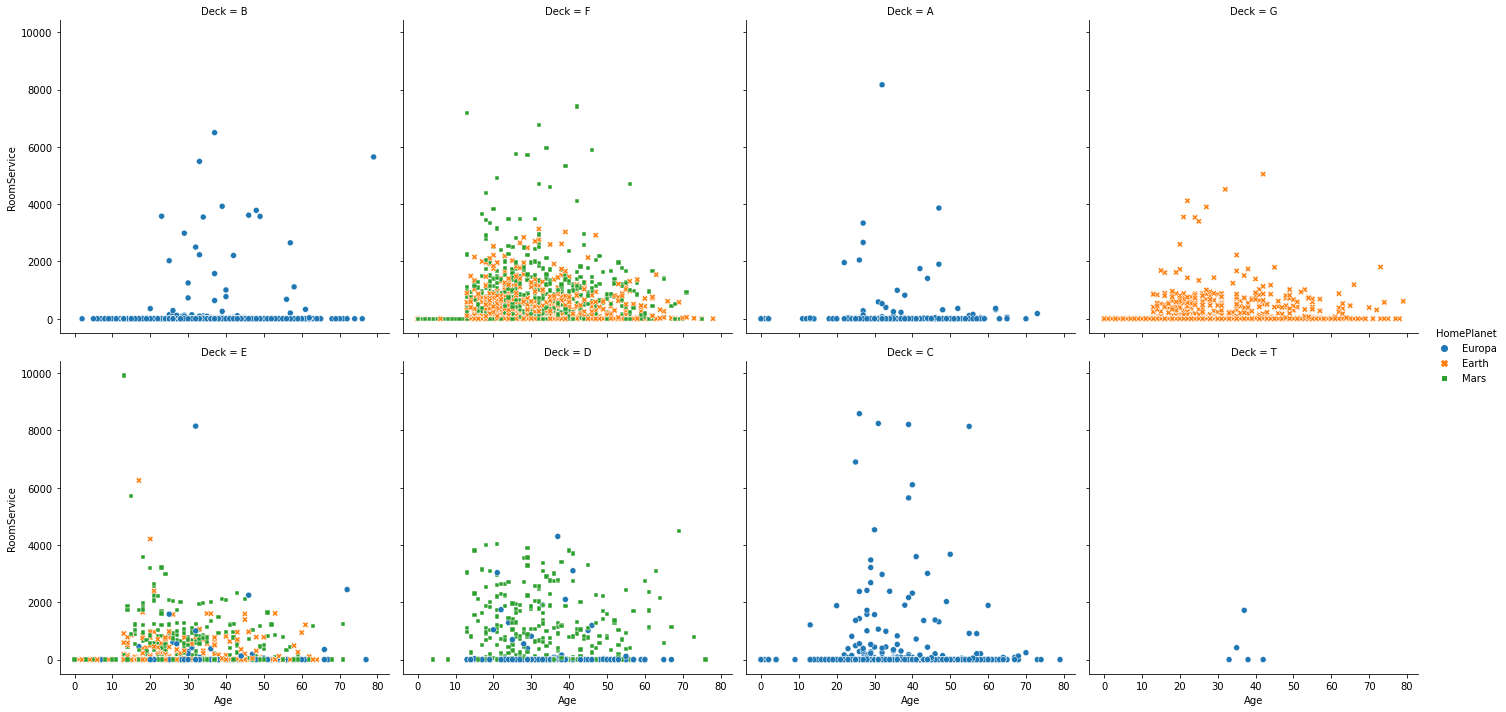

In [90]:
sns.relplot(x='Age', y='RoomService', hue='HomePlanet', style='HomePlanet', col='Deck', col_wrap=4, data=df)

In [93]:
df['DeckNSide'] = df['Deck'] + ':' + df['Side']
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,HasGroup,Deck,CabinNo,Side,DeckNSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,False,B,0,P,B:P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,False,F,0,S,F:S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,True,A,0,S,A:S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,True,A,0,S,A:S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,False,F,1,S,F:S


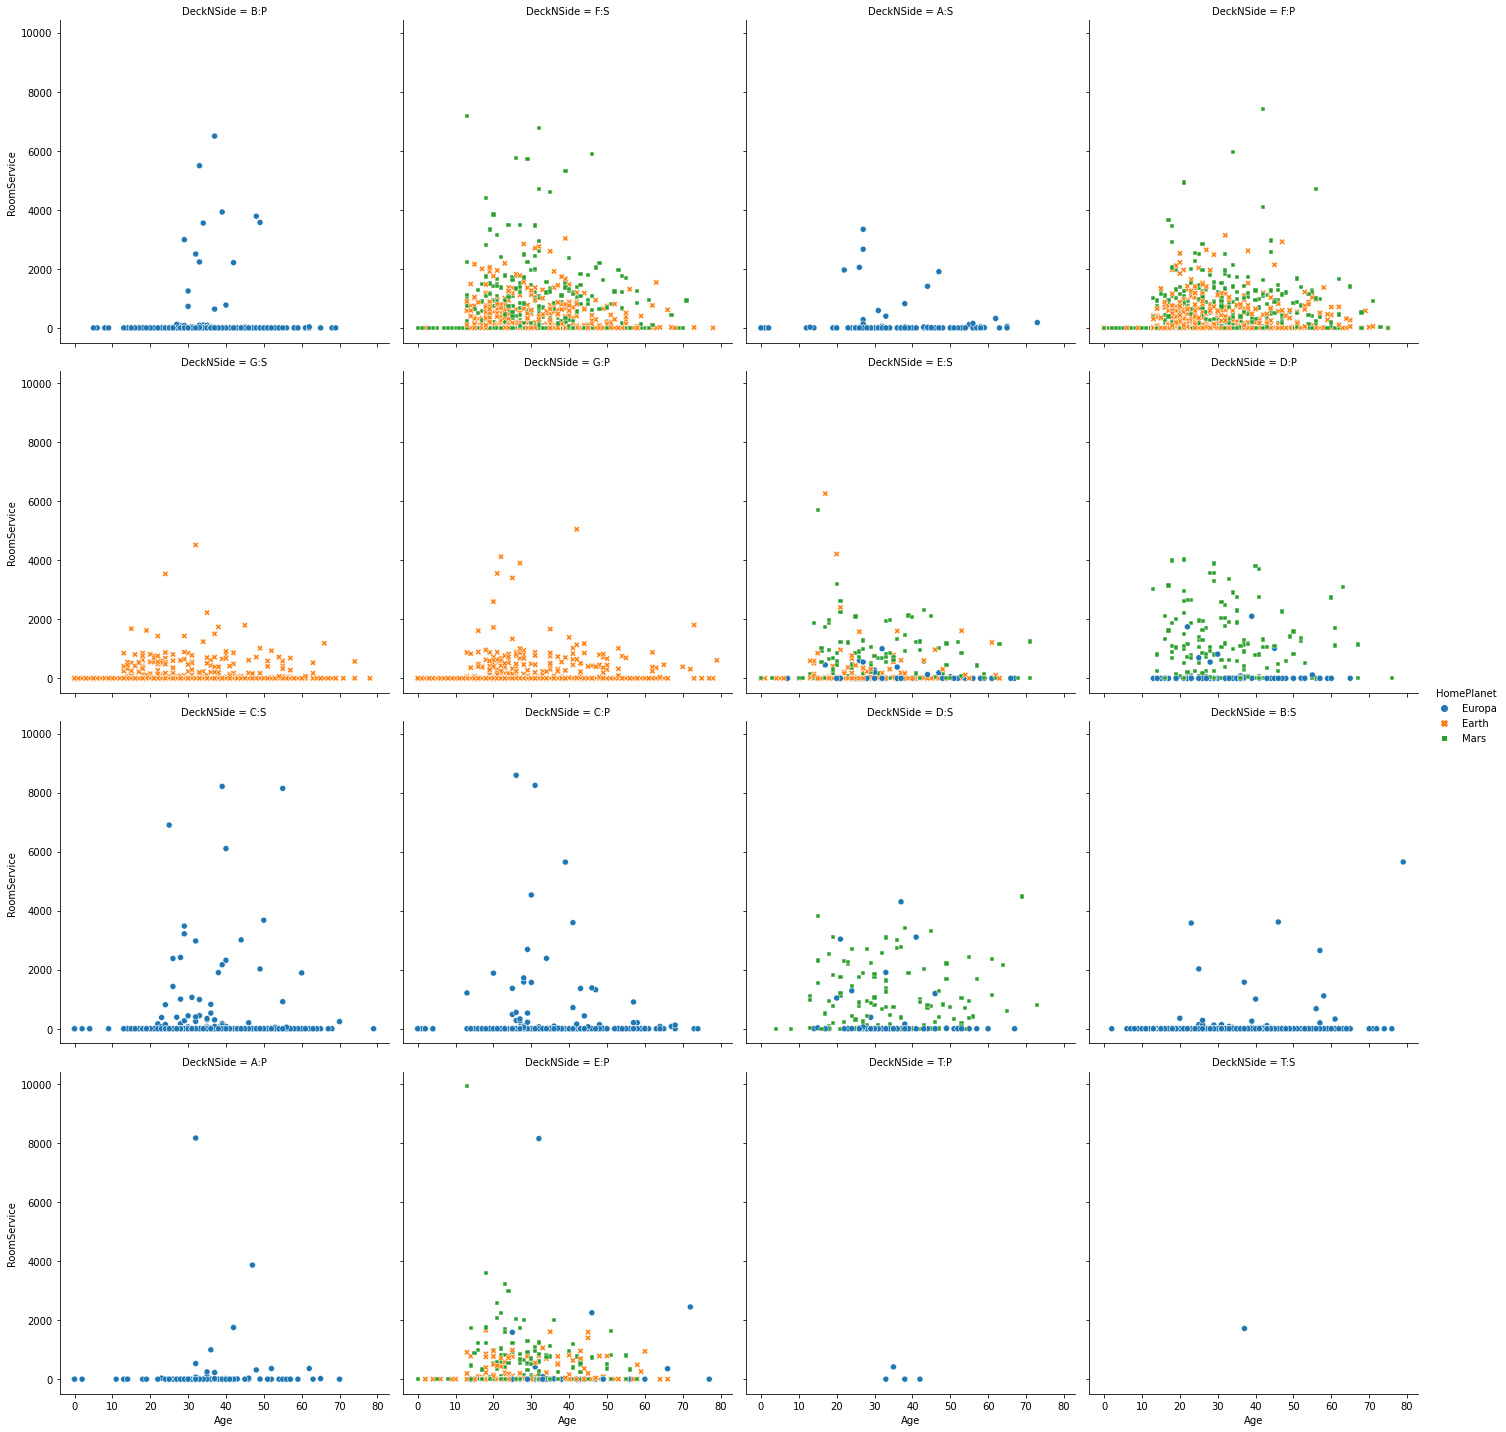

In [95]:
sns.relplot(x='Age', y='RoomService', hue='HomePlanet', style='HomePlanet', col='DeckNSide', col_wrap=4, data=df)

Check if we can know something about destination from decks and sides

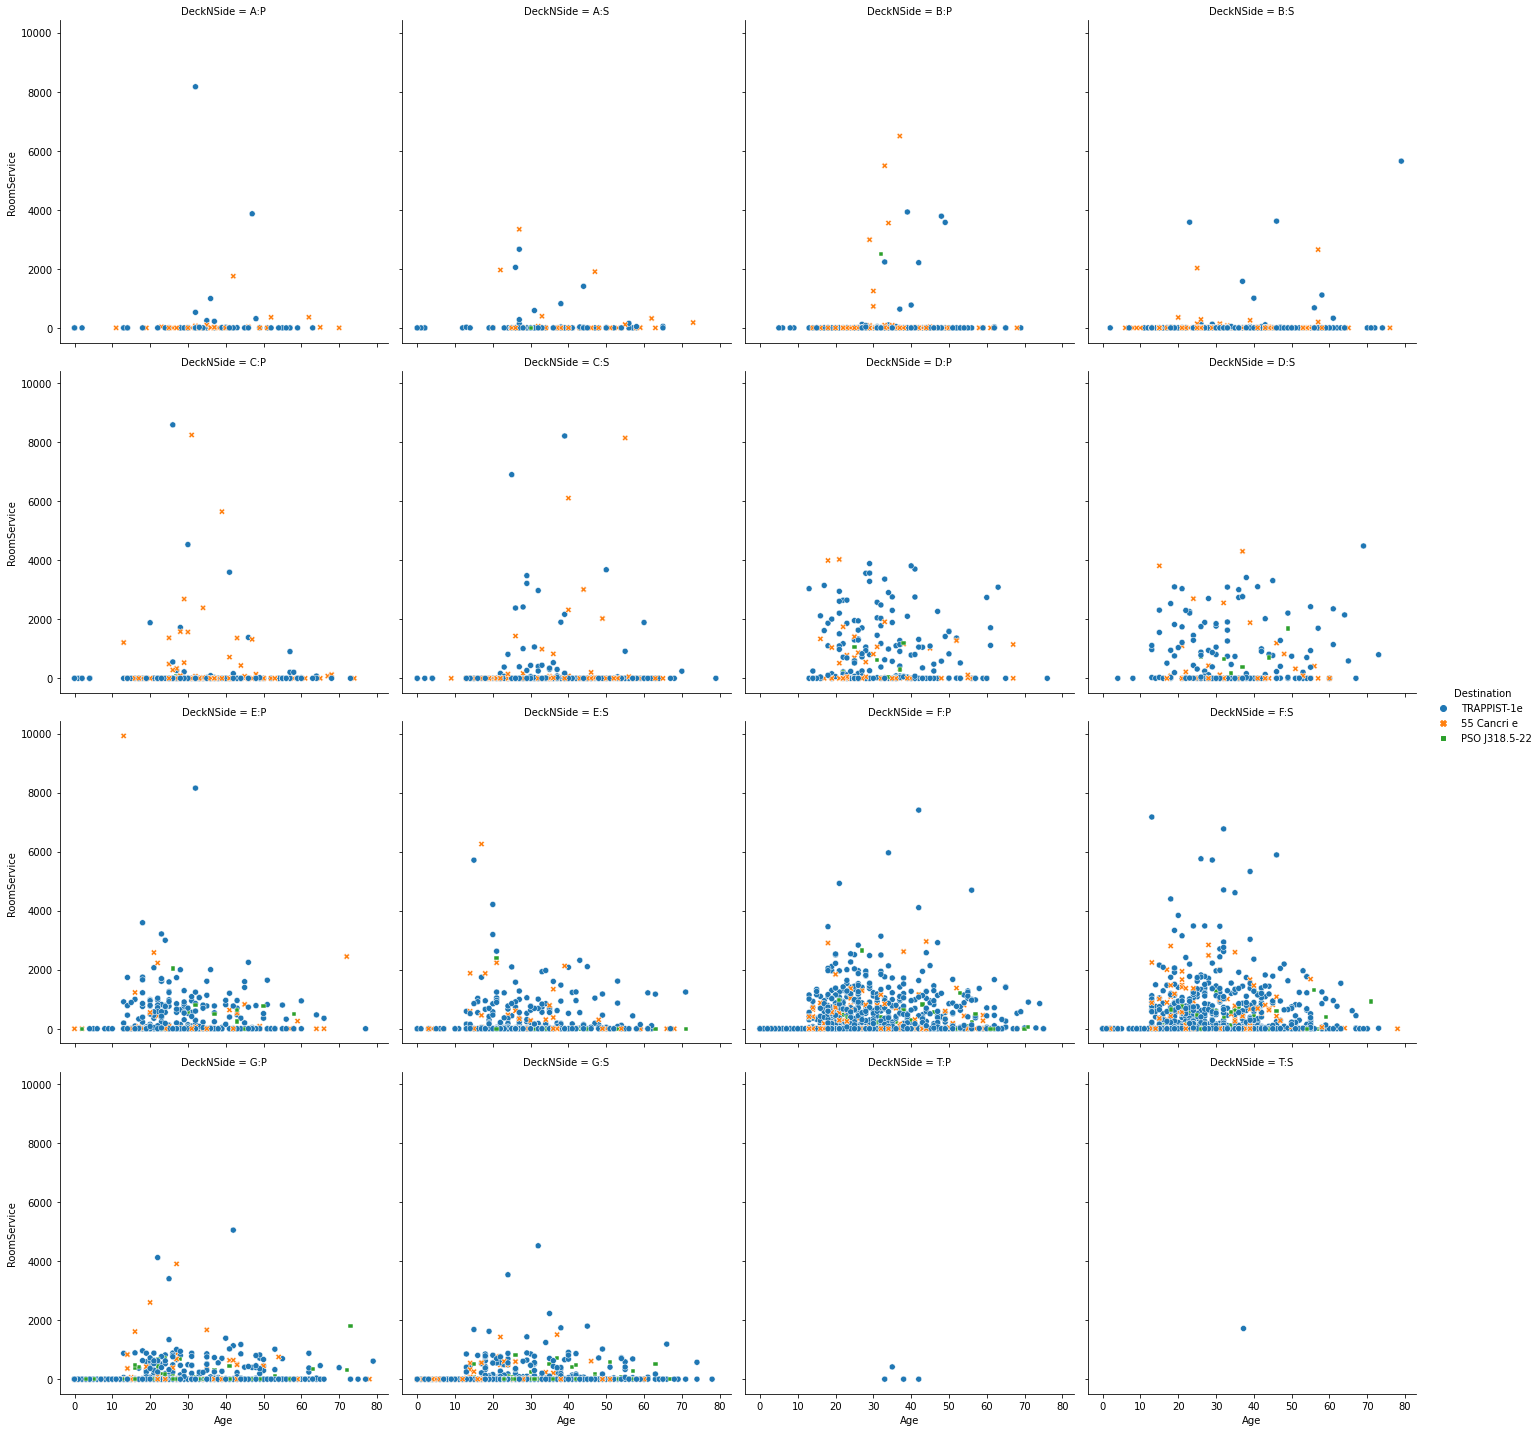

In [97]:
sns.relplot(x='Age', y='RoomService', hue='Destination', style='Destination', col='DeckNSide', col_wrap=4, data=df.sort_values(by=['DeckNSide']))

Nothing useful.
Let's check if there are missing values that can be restored from same group id

In [102]:
groups = df['GroupId'].unique()
groups

array(['0001', '0002', '0003', ..., '9278', '9279', '9280'], dtype=object)

In [105]:
len(df[df['GroupId'] == '0003'])

2

In [107]:
groups_greater_1 = []
for group in groups:
    if len(df[df['GroupId'] == group]) > 1:
        groups_greater_1.append(group)
print('Found {} groups greater than 1'.format(len(groups_greater_1)))

Found 1412 groups greater than 1


In [111]:
df[df['GroupId'].isin(groups_greater_1) & df['HomePlanet'].isna()]['GroupId']

59      0064
405     0444
407     0445
438     0470
505     0540
524     0560
568     0594
637     0665
737     0772
848     0911
993     1056
1024    1089
2227    2384
2322    2505
2425    2597
2715    2908
3119    3361
3433    3703
3635    3911
3891    4172
4535    4822
4632    4933
4702    5014
5079    5424
5081    5427
5112    5465
5438    5810
5624    5981
5689    6032
5904    6262
5953    6313
6056    6405
6267    6634
6450    6810
6591    6954
6854    7249
6917    7336
6918    7336
7286    7790
7339    7853
7363    7873
7786    8314
8077    8637
8295    8860
8353    8938
8383    8961
8489    9072
8613    9194
Name: GroupId, dtype: object

In [113]:
df[df['GroupId'] == '0444']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,HasGroup,Deck,CabinNo,Side,DeckNSide
404,0444_01,Mars,False,D/15/P,TRAPPIST-1e,32.0,True,2484.0,429.0,102.0,0.0,0.0,Camonk Curte,False,0444,True,D,15,P,D:P
405,0444_02,NaN,False,F/99/P,TRAPPIST-1e,26.0,True,1869.0,0.0,136.0,0.0,0.0,Colal Curte,False,0444,True,F,99,P,F:P


In [114]:
df[df['GroupId'].isin(groups_greater_1) & ~df['HomePlanet'].isna()]['GroupId']

2       0003
3       0003
6       0006
7       0006
9       0008
        ... 
8685    9275
8686    9275
8687    9275
8691    9280
8692    9280
Name: GroupId, Length: 3840, dtype: object

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,HasGroup,Deck,CabinNo,Side,DeckNSide
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,True,B,1,P,B:P
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,0008,True,B,1,P,B:P
11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True,0008,True,B,1,P,B:P


In [133]:
groups_different_home = []
groups_home_planet = {}
groups_different_destination = []
for group in groups_greater_1:
    temp_df = df[(df['GroupId'] == group) & df['HomePlanet'].notna()]
    if len(temp_df['Destination'].unique()) > 0:
        groups_home_planet[group] = temp_df['HomePlanet'].unique()[0]
    if len(temp_df['Destination'].unique()) > 1:
        groups_different_destination.append(group)
print('Found {} groups with different HomePlanet'.format(len(groups_different_home)))
print('Found {} groups with different Destination'.format(len(groups_different_destination)))
print('Found {} home planets for groups'.format(len(groups_home_planet.keys())))

Found 0 groups with different HomePlanet
Found 759 groups with different Destination
Found 1411 home planets for groups


In [134]:
for group in groups_home_planet.keys():
    print('For group {} homeplanet is {}'.format(group, groups_home_planet[group]))

For group 0003 homeplanet is Europa
For group 0006 homeplanet is Earth
For group 0008 homeplanet is Europa
For group 0017 homeplanet is Earth
For group 0020 homeplanet is Earth
For group 0031 homeplanet is Mars
For group 0044 homeplanet is Earth
For group 0045 homeplanet is Mars
For group 0056 homeplanet is Europa
For group 0064 homeplanet is Mars
For group 0067 homeplanet is Earth
For group 0082 homeplanet is Mars
For group 0091 homeplanet is Earth
For group 0092 homeplanet is Earth
For group 0098 homeplanet is Earth
For group 0099 homeplanet is Earth
For group 0103 homeplanet is Earth
For group 0108 homeplanet is Earth
For group 0110 homeplanet is Europa
For group 0119 homeplanet is Europa
For group 0128 homeplanet is Mars
For group 0133 homeplanet is Mars
For group 0138 homeplanet is Earth
For group 0140 homeplanet is Earth
For group 0163 homeplanet is Europa
For group 0164 homeplanet is Earth
For group 0167 homeplanet is Mars
For group 0179 homeplanet is Earth
For group 0192 homepl

In [ ]:
#df.loc[df['HomePlanet'].isna() & df['GroupId'].isin(['G']), ['HomePlanet']] = 'Earth'